# **Airplane Engine Type Study Notebook**

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns between an airplanes design features and its Performance features, so that the client can learn which are the most relevant variables to consider when choosing **Engine Type** (jet, piston or propjet) in the design process of a new airplane.

## Inputs

* outputs/datasets/collection/airplane_performance_study.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design'

---

# Load Data

* Dropping the columns with Meta Data 'Model' and 'Company' since these are identifier variables not needed for the study
* Dropping the two Engine "size" features 'THR' (Force with unit lbf) and 'SHP' (Power with unit SHP). The "THR" column is occupied (otherwise showing NaN) when the "Engine Type" is categorized with Jet and the same goes for the "SHP" when the "Engine Type" is categorized with piston or propjet. These two features () are interesting from an Aircraft Design perspective but since these are different quantities with different units they become difficult/awkward to compare with each other.

In [4]:
import pandas as pd
df = (pd.read_csv("/workspace/data-driven-design/outputs/datasets/collection/airplane_performance_study.csv")
    .drop(['Model', 'Company', 'THR', 'SHP'], axis=1))
df.head(10)

,Wing Span,Length,Height,Multi Engine,TP mods,Engine Type,AUW,MEW,FW,Vmax,...,Vstall,Range,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl
0,37.416667,25.250000,10.250000,False,False,0,2050.0,1180.0,241.2,104.0,...,46.0,370.0,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075
1,36.083333,20.583333,8.750000,False,False,0,1350.0,820.0,100.5,89.0,...,44.0,190.0,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824
2,35.000000,21.416667,8.583333,False,False,0,1300.0,810.0,127.3,90.0,...,37.0,210.0,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317
3,35.000000,21.416667,8.583333,False,False,0,1300.0,800.0,127.3,88.0,...,37.0,210.0,13000.0,13000.0,620.0,620.0,500.0,407.797297,850.0,642.046166
4,35.000000,21.416667,8.750000,False,False,0,1220.0,740.0,93.8,83.0,...,33.0,175.0,12500.0,12500.0,370.0,370.0,632.0,297.056192,885.0,329.571813
5,36.083333,20.333333,8.750000,False,False,0,1250.0,786.0,100.5,78.0,...,33.0,180.0,11000.0,11000.0,360.0,360.0,583.0,393.226454,880.0,542.445142
6,36.666667,34.833333,12.083333,True,False,0,6315.0,4275.0,1105.5,264.0,...,80.0,868.0,25000.0,14500.0,1820.0,320.0,3080.0,1950.000000,2100.0,1425.000000
7,36.583333,34.750000,12.083333,True,False,0,6000.0,4125.0,1105.5,262.0,...,77.0,1020.0,28000.0,12900.0,1755.0,302.0,2250.0,1800.000000,2076.0,1217.000000
8,36.666667,34.833333,12.083333,True,False,0,6000.0,4056.0,1105.5,257.0,...,77.0,1101.0,25000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000
9,36.666667,34.833333,12.083333,True,False,0,6000.0,3958.0,1105.5,257.0,...,77.0,1174.0,30000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

Inspect and reflect on following points for each of the data features
* Data types
* Distribution
* Missing levels
* What they mean in a business context

Comment on: e.g inballance and that the data set has more continous than categorical data
* Data set is dominated by numerical/quantitative, continous data and only three categorical features:
  * Multi Engine
  * TP mods
  * Engine Type
* The categorical data could be considered nominal since the categories simply represent different propulsion cases however they could also be considered ordinal since Multiple Engines are more than a single Engine, that a modified Engine could represent an improved engine and that a Jet Engine has many advantages over Piston etc.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

In [6]:
# Check the data types
print(df.dtypes)

Wing Span       float64
Length          float64
Height          float64
Multi Engine       bool
TP mods            bool
Engine Type       int64
AUW             float64
MEW             float64
FW              float64
Vmax            float64
Vcruise         float64
Vstall          float64
Range           float64
Hmax            float64
Hmax (One)      float64
ROC             float64
ROC (One)       float64
Vlo             float64
Slo             float64
Vl              float64
Sl              float64
dtype: object


Converting data type of Multi Engine to object and checking if the conversion was successfull

In [7]:
# Convert to categorical type
df['Multi Engine'] = df['Multi Engine'].astype('object')

# Verify the conversion
df['Multi Engine'].dtype


dtype('O')

In [8]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables='Multi Engine', drop_last=False)
df_ohe = encoder.fit_transform(df)
df_ohe.head(3)

,Wing Span,Length,Height,TP mods,Engine Type,AUW,MEW,FW,Vmax,Vcruise,...,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Multi Engine_False,Multi Engine_True
0,37.416667,25.250000,10.250000,False,0,2050.0,1180.0,241.2,104.0,91.0,...,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075,1,0
1,36.083333,20.583333,8.750000,False,0,1350.0,820.0,100.5,89.0,83.0,...,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824,1,0
2,35.000000,21.416667,8.583333,False,0,1300.0,810.0,127.3,90.0,78.0,...,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317,1,0


In [9]:
# Get column names
column_names = df_ohe.columns
print(column_names)

Index(['Wing Span', 'Length', 'Height', 'TP mods', 'Engine Type', 'AUW', 'MEW',
       'FW', 'Vmax', 'Vcruise', 'Vstall', 'Range', 'Hmax', 'Hmax (One)', 'ROC',
       'ROC (One)', 'Vlo', 'Slo', 'Vl', 'Sl', 'Multi Engine_False',
       'Multi Engine_True'],
      dtype='object')


We convert the column names created by the onehotencoder to make the table more intuitive to read.

Reference to below fix: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [10]:
# Bugfix: Make a copy
df_ohe = df_ohe.copy()

# Replace column name
df_ohe.rename(columns={'Multi Engine_False': 'Single Engine'}, inplace=True)
df_ohe.rename(columns={'Multi Engine_True': 'Multi Engine'}, inplace=True)

# Define the new order of columns (example)
# new_order = ['Single Engine', 'Multi Engine']  # Adjust this list as needed

#df_ohe = df_ohe[new_order]
#df_ohe.to_csv('rearranged_file.csv', index=False)

df_ohe.head(3)


,Wing Span,Length,Height,TP mods,Engine Type,AUW,MEW,FW,Vmax,Vcruise,...,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Single Engine,Multi Engine
0,37.416667,25.250000,10.250000,False,0,2050.0,1180.0,241.2,104.0,91.0,...,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075,1,0
1,36.083333,20.583333,8.750000,False,0,1350.0,820.0,100.5,89.0,83.0,...,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824,1,0
2,35.000000,21.416667,8.583333,False,0,1300.0,810.0,127.3,90.0,78.0,...,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317,1,0


Figure out why they have used Pearson and Spearman here to correlate a categorical data (single or multi engine) since these are not the best When the target variable is categorical and the features are continuous. The following methods will provide a more meaningfull insight:

Point-biserial correlation: If the categorical target is binary, this is appropriate for measuring the relationship between the continuous feature and the binary outcome.

Logistic regression: This is often a preferred method for modeling the relationship between continuous predictors and a binary categorical outcome.

ANOVA or t-tests: If you want to compare means of the continuous features across different categories in your target variable.

Chi-square tests: For categorical features, although not directly applicable to your continuous features, it can be helpful if you bin your continuous features.

### Using "Engine Type" as target variable

We are using the One Hot Encoder on the categorical features ("Engine Type", "Multi Engine") to 
"Avoids Ordinal Relationships" (One hot encoding prevents the model from assuming any ordinal relationship between the categories. For example, if you simply assigned numbers to categories (1 for Red, 2 for Green, 3 for Blue), the model might interpret Green as being "greater" than Red, which is not the case.)

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

Make sure the datatype is either object or category (othervise the OneHotEncoder will not work!)

Calculate Pearson to check the Linear relationship between variables

In [39]:
# Step 1: Select relevant numeric columns (excluding 'Multi Engine' if needed)
df_subset = df_ohe.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Pearson correlation with 'Single Engine' as well as 'Multi Engine'
corr_pearson_single_engine = df_subset.corr(method='pearson')['Single Engine'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson_multi_engine = df_subset.corr(method='pearson')['Multi Engine'].sort_values(key=abs, ascending=False)[1:].head(10)

# Drop "Single Engine" and "Multi Engine" from the Series if they exist
corr_pearson_single_engine = corr_pearson_single_engine.drop(['Multi Engine'], errors='ignore')
corr_pearson_multi_engine = corr_pearson_multi_engine.drop(['Single Engine'], errors='ignore')

# Now print the remaining correlations
print(corr_pearson_single_engine)

Vstall    -0.750391
Hmax      -0.700671
Vcruise   -0.677655
Vmax      -0.670724
Vl        -0.659330
Height    -0.634744
ROC       -0.607351
Length    -0.602029
Sl        -0.578558
Name: Single Engine, dtype: float64


We do the same for `spearman` to check the Monotonic relationship between variables

In [38]:
# Step 1: Select relevant numeric columns (excluding 'Multi Engine' if needed)
df_subset = df_ohe.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Pearson correlation with 'Single Engine' as well as 'Multi Engine'
corr_spearman_single_engine = df_subset.corr(method='spearman')['Single Engine'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman_multi_engine = df_subset.corr(method='spearman')['Multi Engine'].sort_values(key=abs, ascending=False)[1:].head(10)

# Drop "Single Engine" and "Multi Engine" from the Series if they exist
corr_spearman_single_engine = corr_spearman_single_engine.drop(['Multi Engine'], errors='ignore')
corr_spearman_multi_engine = corr_spearman_multi_engine.drop(['Single Engine'], errors='ignore')

# Now print the remaining correlations
print(corr_pearson_single_engine)

Vstall    -0.750391
Hmax      -0.700671
Vcruise   -0.677655
Vmax      -0.670724
Vl        -0.659330
Height    -0.634744
ROC       -0.607351
Length    -0.602029
Sl        -0.578558
Name: Single Engine, dtype: float64


For both methods, we notice moderate or strong levels of correlation between multi engine and a given variable. 
* This is good news since we Ideally pursue strong correlation levels.

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [40]:
top_n = 5
set(corr_pearson_single_engine[:top_n].index.to_list() + corr_pearson_single_engine[:top_n].index.to_list())
set(corr_pearson_multi_engine[:top_n].index.to_list() + corr_pearson_multi_engine[:top_n].index.to_list())

{'Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall'}

Therefore (by looing on the sign before the correlation values we can determine if one increases or decreases as the target, Multi Engine, increases) we are studying at df the following variables. We will investigate if:
* A multi engined airplane typically has a higher Hmax than a single engined airplane
* A multi engined airplane typically has a higher Vcruise than a single engined airplane
* A multi engined airplane typically has a higher Vl than a single engined airplane
* A multi engined airplane typically has a higher Vmax than a single engined airplane
* A multi engined airplane typically has a higher Vstall than a single engined airplane

In [41]:
vars_to_study = ['Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall']
vars_to_study

['Hmax', 'Vcruise', 'Vl', 'Vmax', 'Vstall']

# EDA on selected variables

In [15]:
df_eda = df.filter(vars_to_study + ['Multi Engine'])
df_eda.head(30)

,Hmax,Vcruise,Vmax,Vstall,Multi Engine
0,13000.000000,91.0,104.000000,46.000000,False
1,12300.000000,83.0,89.000000,44.000000,False
2,16000.000000,78.0,90.000000,37.000000,False
3,13000.000000,78.0,88.000000,37.000000,False
4,12500.000000,74.0,83.000000,33.000000,False
5,11000.000000,72.0,78.000000,33.000000,False
6,25000.000000,230.0,264.000000,80.000000,True
7,28000.000000,247.0,262.000000,77.000000,True
8,25000.000000,235.0,257.000000,77.000000,True
9,30000.000000,237.0,257.000000,77.000000,True


## Variables Distribution by Multi Engine

We plot the distribution (numerical and categorical) coloured by Multi Engine

In [16]:
%matplotlib inline

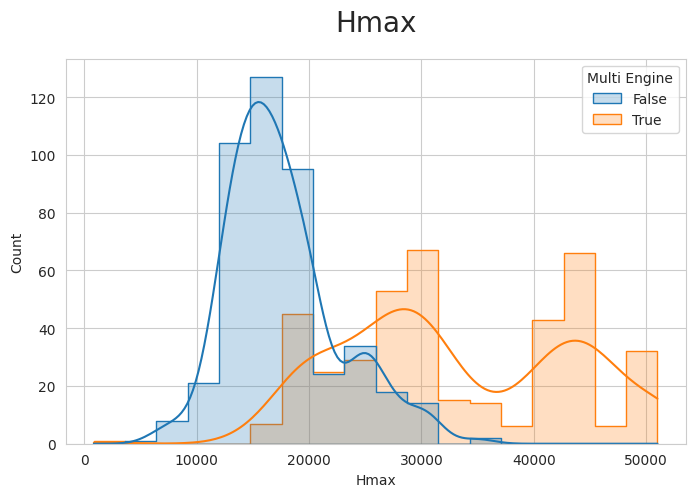

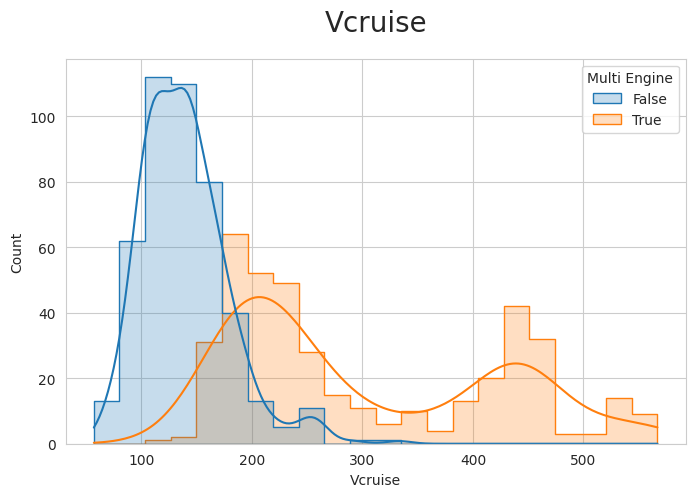

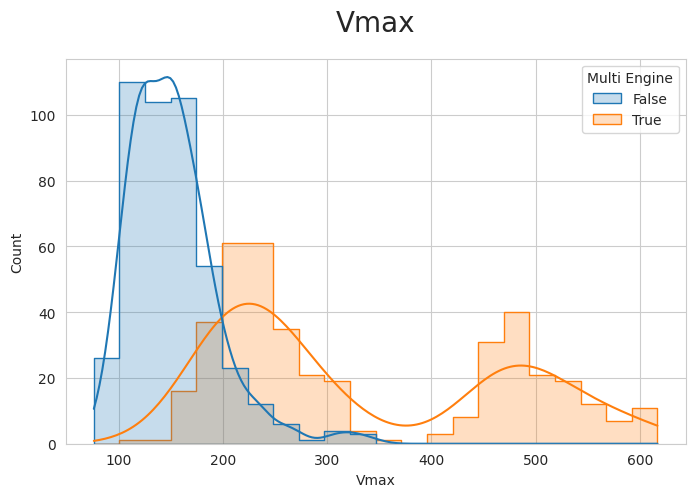

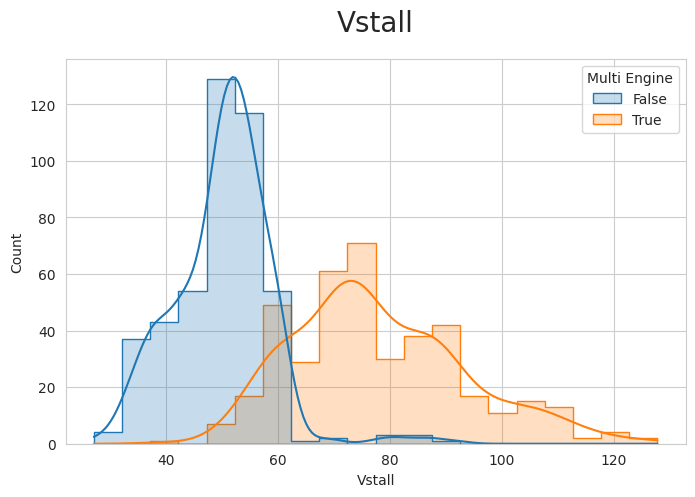

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'Multi Engine'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")


---

## Parallel Plot

Create a separate DataFrame and transform `tenure` (numerical) into bins (categorical) for visualising at `parallel_categories()` plot


In [18]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
tenure_map = [-np.Inf, 6, 12, 18, 24, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'tenure': tenure_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

KeyError: "None of [Index(['tenure'], dtype='object')] are in the [columns]"

In [14]:
disc.binner_dict_['tenure']

[-inf, 6, 12, 18, 24, inf]

Create a map to replace the `tenure` variable with more informative levels.

In [15]:
n_classes = len(tenure_map) - 1
classes_ranges = disc.binner_dict_['tenure'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

labels_map


{0: '<6', 1: '6 to 12', 2: '12 to 18', 3: '18 to 24', 4: '+24'}

Replace using `.replace()`

In [16]:
df_parallel['tenure'] = df_parallel['tenure'].replace(labels_map)
df_parallel.head()

,Contract,InternetService,OnlineSecurity,TechSupport,tenure,Churn
0,Month-to-month,DSL,No,No,<6,0
1,One year,DSL,Yes,No,+24,0
2,Month-to-month,DSL,Yes,No,<6,1
3,One year,DSL,Yes,Yes,+24,0
4,Month-to-month,Fiber optic,No,No,<6,1


Creates multi-dimensional categorical data plot

In [17]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="Churn")
fig.show(renderer='jupyterlab')

ModuleNotFoundError: No module named 'plotly'

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

---

Well done! You generated code that answers business requirement 1 and can be used to build Streamlit App
* In this notebook, we are not pushing any file to the repo.
* Clear the cell's outputs before moving on!